# Probability 2 (Master Data science, University of Lille) / CMF (Centrale Lille, G3 SDIA)

---

## Lab 2 - Queues, Metropolis-Hastings and simulated annealing

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate queues, implement an example of a Metropolis-Hasting algorithm and simulated annealing.

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab2_Name1_Name2
- duplicate the notebook file and rename it lab2_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab2` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab2 --file=requirement.txt
    conda activate lab2
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab2
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab2`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation

## <a name="content">Contents</a>
- [Exercise 1: Simulating $M/M/1/\infty$ and $M/M/1/K$ queues](#ex1)
- [Exercise 2: Drawing samples from the Ising model with the Metropolis-Hasings algorithm](#ex2)
- [Exercise 3: Simulated annealing for the *traveling salesman* problem](#ex3)

In [1]:
# "IPython magic command" to automatically reload any module whose
# implementation has been modified during the execution of the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

---
## <a name="ex1">Exercise 1: Simulating $M/M/1/\infty$ and $M/M/1/K$ queues</a> [(&#8593;)](#content)

This exercise will focus on simulating an $M/M/1/\infty$ and an $M/M/1/K$ queue to illustrate some of the results covered in lecture 5. <!--in Chapter 2 and in TD.3-->

In the following, the parameter of the exponential distributions governing the inter-arrival and service times will be denoted $\lambda$ and $\mu$ respectively, with $0< \lambda < \mu $. The time instants at which changes occur in the process $X(t)$ will be denoted by $T_n$ for $n \in \mathbb{N}$. We further define:

\begin{equation}
    \rho = \frac{\lambda}{\mu}, \; X_n = X(T_n).
\end{equation}

### $M/M/1/\infty$-queue

1\. a) Using the lecture notes, implement a function to simulate a trajectory $X(t)$ of an $M/M/1/\infty$ process, where $X(t)$ represents the number of customers in the system at time $t$. <!--  from Chapter 2, Section 2.3.1 -->

> *Remark*: the signature of the function could be of the form:
``` python
def run_mm1inf(lambd: float, mu: float, rng, niter: int):
    """
    Args:
        lambd (float): birth rate.
        mu (float): death rate
        rng (int): random seed (or random generator).
        niter (int): number of changes (events) in 
                     the process.
    Raises:
        ValueError: error triggered if lambd <= 0.
        ValueError: error triggered if mu <= 0.
    Returns:
        X (array_like): trajectory (X(t_n)).
        T (array_like): time instants at which a change in 
                        the process occurs (t_n).
    """ 
```

In [65]:
def run_mm1inf(lambd: float, mu: float, rng, niter: int):
    assert lambd>0
    assert mu >0
    nb_personne = 0
    
    T,X=[0],[nb_personne]
    
    
    
    for i in range(niter):
        if X[-1] == 0:
            T.append(T[-1]+rng.exponential(lambd))
            X.append(X[-1]+1)
        else:
            Tb = rng.exponential(lambd)
            Td = rng.exponential(mu)
            if Tb>Td : 
                T.append(T[-1]+Tb)
                X.append(X[-1]+1)
            else:
                T.append(T[-1]+Td)
                X.append(X[-1]-1)
    return(np.array(X),np.array(T))

b) Display the generated trajectory of the process for $(\lambda,\mu) = (5, 6)$ (e.g., use only the last 100 samples of the trajectory to obtain a representative illustration).

> *Hint*: use the function `step` from the matlplotlib library.

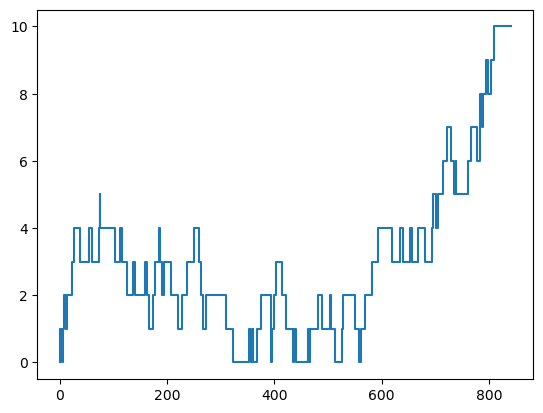

In [84]:
lambd_mm1inf = 5
mu_mm1inf = 6
rng = np.random.default_rng(1200)
rho_mm1inf = lambd_mm1inf/mu_mm1inf

X_mm1inf,T_mm1inf = run_mm1inf(lambd_mm1inf, mu_mm1inf, rng, niter=100)
plt.step(T_mm1inf,X_mm1inf)

2\. a) Display on the same graph the normalized histogram of $X(t)$ and it's stationary distribution $\pi$ defined by (see Proposition 2.1 in lecture 5)

\begin{equation}
    (\forall i \in \mathbb{N}), \; \pi(i) = (1 - \rho)\rho^i.
\end{equation}

What does this graph illustrate?

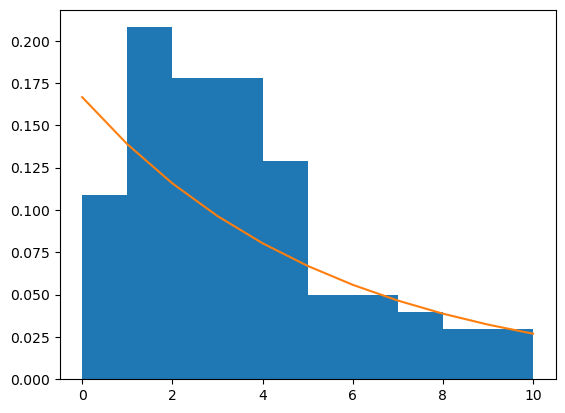

In [85]:
stationary_distrib_mm1inf = lambda i,rho_mm1inf : (1-rho_mm1inf)*rho_mm1inf**i 
valeurs_prises_mm1inf = np.unique(X_mm1inf)

plt.hist(X_mm1inf,bins=valeurs_prises_mm1inf,density=True)
plt.plot(valeurs_prises_mm1inf,stationary_distrib_mm1inf(valeurs_prises_mm1inf,rho_mm1inf))

b) Empirically evaluate the average number of customers, whose value should be close close to the theoretical value $\frac{\rho}{1-\rho}$ (see Definition 2.3 p. 2 in lecture 5).

In [86]:
theorical_value_mm1inf = rho_mm1inf/(1-rho_mm1inf)
empirical_value_mm1inf = np.mean(X_mm1inf)
print(theorical_value_mm1inf)
print(empirical_value_mm1inf)


5.000000000000002
2.9504950495049505


### $M/M/1/K$

Consider the case where the size of the capacity service $K$ is finite, i.e., where the system can only accommodate up to $K$ customers. In comparison with the previous case, any new customer trying to enter the system at a time instant $t$ will be systematically rejected if $X(t) = K$.

3\. a) Propose a variant of the function developed in 1.a) to simulate a trajectory of an $M/M/1/K$ process.

In [87]:
def run_mm1K(lambd: float, mu: float,K : int, rng, niter: int):
    assert lambd>0
    assert mu >0
    nb_personne = 0
    
    T,X=[0],[nb_personne]
    
    
    
    for i in range(niter):
        if X[-1] == 0:
            T.append(T[-1]+rng.exponential(lambd))
            X.append(X[-1]+1)
        else:
            Tb = rng.exponential(lambd)
            Td = rng.exponential(mu)
            if Tb>Td : 
                T.append(T[-1]+Tb)
                X.append(min(X[-1]+1,K))
            else:
                T.append(T[-1]+Td)
                X.append(X[-1]-1)
    return(np.array(X),np.array(T))

b) Display the trajectory of the process for $(\lambda,\mu, K) = (5, 6, 3)$.

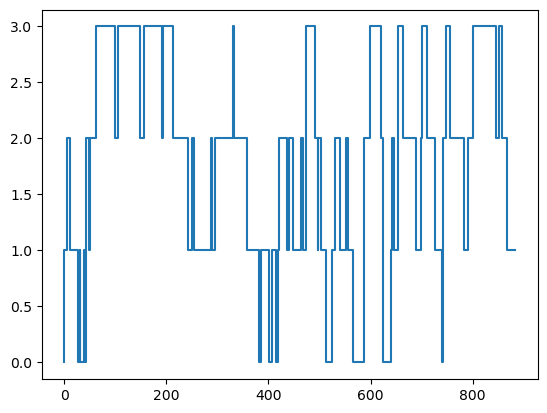

In [124]:
lambd_mm1K = 5
mu_mm1K = 6
K=3
rng_mm1K = np.random.default_rng(1200)
rho_mm1K = lambd_mm1K/mu_mm1K

X_mm1K,T_mm1K = run_mm1K(lambd_mm1K, mu_mm1K,K, rng, niter=100)
plt.step(T_mm1K,X_mm1K)

4\. a) Display on the same graph the normalized histogram of $X(t)$ and the stationary distribution $\pi$ defined as

$$
    (\forall i \in \mathbb{N}), \; \pi(i) =
    \begin{cases}
        \frac{(1-\rho)\rho^i}{1-\rho^{K+1}} & \text{if } i \in \{0, 1, \dotsc, K \} \\
        0 & \text{otherwise.}
    \end{cases}
$$

What does this graph illustrate?

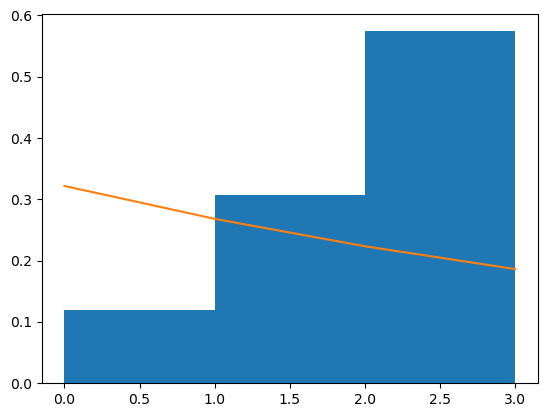

In [125]:
stationary_distrib_mm1K = lambda i,rho_mm1K,K : ((1-rho_mm1K)*rho_mm1K**i) / (1-rho_mm1K**(K+1)) *(i<=K)
valeurs_prises_mm1K= np.unique(X_mm1K)

plt.hist(X_mm1K,bins=valeurs_prises_mm1K,density=True)
plt.plot(valeurs_prises_mm1K,stationary_distrib_mm1K(valeurs_prises_mm1K,rho_mm1K,K))

In [128]:
def theorical_mean(rho_mm1K,K):
    
        return np.sum([i*stationary_distrib_mm1K(i,rho_mm1K,K) for i in range(K+1)])

b) Compute the theoretical average number of customers, and estimate its value using the function developed in 3.a). <!--(see TD3, exercise 3)-->

In [129]:
theorical_value_mm1K = theorical_mean(rho_mm1K,K)
empirical_value_mm1K = np.mean(X_mm1K)
print(theorical_value_mm1K)
print(empirical_value_mm1K)

1.2742175856929956
1.7227722772277227


---
## <a name="ex2">Exercise 2: Drawing samples from the Ising model with the Metropolis-Hastings algorithm</a> [(&#8593;)](#content)

Consider the 2D Ising model covered in Chapter 3, section 3 of the lecture notes, taken over an $N \times N$ grid for $N = 32$, with $\beta = 0.6$. <!-- Chapter 3, p.36 -->

1\. Implement a Metropolis-Hastings algorithm to draw samples from the 2D Ising model in the above configuration. Progressively display the evolution of the image as the algorithm evolves. Generate 10000 such variables, starting from a random configuration. Qualitatively comment the content of the last few generated samples, in comparison with the initial state.

> *Note*: a) the matlpotlib examples given [here](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/) can be useful
>
> b) given the relatively slow evolution from one iteration to another, you may display the current state of the image only once every 20 iterations.

In [162]:
N = 32
beta = 10
num_samples = 10000
display_iter=100

2\. Decrease the value of the parameter $\beta = 0.1$, and generate 10000 new variables with the algorithm implemented in 1. What is the influence of the parameter $\beta$?

In [166]:
from IPython.display import clear_output

def metro_hasting_ising_2D(N,beta,num_samples,display_iter):
    grid = 2*np.random.randint(2, size=(N,N))-1
    B = [np.mean(grid)]

    for i in range(num_samples):
     
        x = np.random.randint(N)
        y = np.random.randint(N)

        delta_E = 2 * grid[x,y] * (grid[(x+1)%N,y] + grid[(x-1)%N,y] + grid[x,(y+1)%N] + grid[x,(y-1)%N])
        
        if np.random.rand() < np.exp(-beta * delta_E):
            grid[x,y] = -grid[x,y]

        B.append(np.mean(grid))
        if i % display_iter == 0:
            clear_output(wait=True)
            plt.imshow(grid, cmap="gray", vmin=-1, vmax=1)
            plt.show()

    return(B)




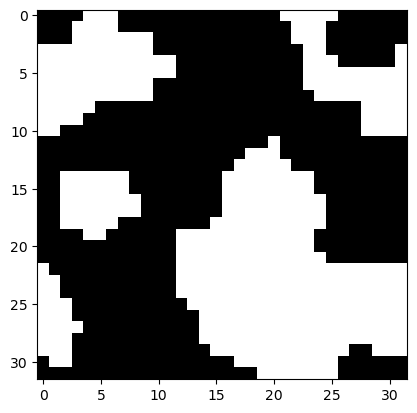

In [168]:
B = metro_hasting_ising_2D(N,beta,num_samples,display_iter)

---
## <a name="ex3">Exercise 3: Simulated annealing for the *traveling salesman* problem</a> [(&#8593;)](#content)

This exercise will be focused on the implementation of a basic simulated annealing algorithm to minimize a function $f : E \subset \mathbb{N} \rightarrow \mathbb{R}$, where $E$ is finite. An application to the *traveling salesman* problem will then be considered to test the algorithm implementation. 

In general, a simulated annealing algorithm can be described as follows.

---
**Simulated annealing**

Set $x_0 \in E$, $T_0  > 0$. 

$n \leftarrow 0$

While $(n \leq N)$ and $(T_n > T_{\min})$

  1. Draw a point $y \sim Q(x_n, \cdot)$ in the neighborhood of $x_n$, and $u \sim \mathscr{U}([0,1])$ (where $\mathscr{U}$ is the uniform distribution)
  
  2. Compute the acceptance probability: 
  
$$
    p(f(x_n), f(y), T_n) = 
    \begin{cases}
        1 & \text{if } f(y) < f(x_n) \\
        e^{-(f(y) - f(x_n))/T_n} & \text{otherwise.}
    \end{cases}
$$
  
  3. Set $x_{n+1} = \begin{cases}
       y & \text{if } u \leq p(f(x_n), f(y), T_n) \\
       x_n & \text{otherwise.}
       \end{cases}$
  4. Set $T_{n+1} = \frac{T_0}{\log(n+2)}$
  5. $n \leftarrow n+1$

Return $x_N$, $\bigl( f(x_n) \bigr)_{1 \leq n \leq N}$

> *Note*: in practice, the transition kernel $Q$, the neighborhood of the current point $x_n$ needs to be defined by the user, depending on the problem of interest. The definition of the other elements will be specified later for the *traveling salesman* problem.

---

1\. Implement a generic `simulated_annealing` function to be run for a maximum of $N$ iterations.

> *Note*: you can for instance create an object gathering several abstract methods to be instanciated (e.g., `draw_neighbour`, `acceptance_probability`, ...). Using functions and lambda functions is another possibility.

In [337]:
def acceptance_probability(f,y,xn,Tn):
    return(1 if f(y)<f(xn) else np.exp(-(f(y)-f(xn))/Tn))

def simulated_annealing(f,N,T_min,x0,T0):
    
    n = 0
    
    xn = x0
    Tn=T0
    
    X,F=[],[]
    
    while n<N and Tn>T_min:
        y = draw_neighbour(xn)
        u = np.random.uniform()
        xn = y if u <= acceptance_probability(f,y,xn,Tn) else xn
        X.append(xn)
        F.append(f(xn))
        Tn = T0/np.log(n+2)
        n=n+1
    return(X,F)



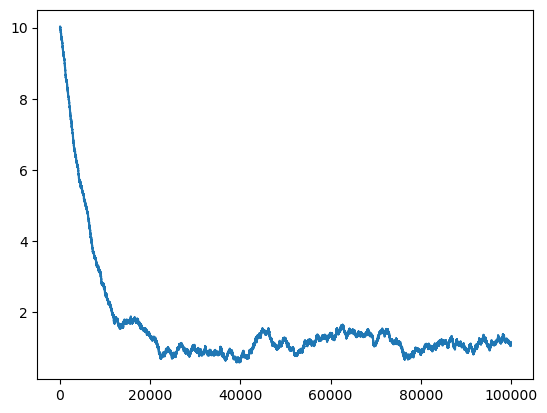

In [340]:
def draw_neighbour(xn):
    return(xn+0.005 if np.random.uniform()<0.5 else xn-0.005 )



X ,F= simulated_annealing(f=lambda x:(x-1)**2,N=100000,T_min=0.0005,x0 = 10,T0 = 1)

plt.plot(X)


The algorithm implemented in 1. will be applied to the *traveling salesman* problem, briefly described in the following lines.

---
**The Traveling Salesman problem**

A salesman must find the shortest route going only once through $K$ cities, represented by the points $C_1, \dotsc, C_K$ in $\mathbb{R}^2$. In this case, the set of all possible routes $E$ contains $K!$ elements, which excludes an exhaustive search as $K$ increases (*e.g.*, for $K \geq 10$). For this application, the problem thus consists in finding a route, i.e., a permutation $\sigma$ in the symmetric group $\Sigma_K$, minimizing the function

\begin{equation}
    \sigma = \bigl( \sigma(1), \dotsc , \sigma(K) \bigr) \mapsto f(x) = \sum_{i = 1}^{K} \text{dist} (C_{\sigma(i)}, C_{\sigma(i+1)})
\end{equation}

with the convention $\sigma(K+1) = \sigma(1)$. In this case, simulated annealing randomly explores $\Sigma_K$ from one possible route to another located in its vicinity (which needs to be defined). 

In the following, the route $\tilde{\sigma} = \bigl( \tilde{\sigma}(1), \dotsc, \tilde{\sigma}(K) \bigr)$ will be said to be a neighbour of $\sigma = \bigl( \sigma(1), \dotsc, \sigma(K) \bigr)$ if there exists $1 \leq i < k \leq K $ such that:

\begin{equation}
   \bigl( \tilde{\sigma}(1), \dotsc ,\tilde{\sigma}(K) \bigr) = \bigl( \sigma(1), \dotsc, \sigma(i−1), \sigma(k), \sigma(k−1), \dotsc, \sigma(i+1), \sigma(i), \sigma(k+1), \dotsc, \sigma(K) \bigr). 
\end{equation}

For instance, for $K = 8$, the permutations $(1,2,3,4,8,7,6,5)$ and $(1,2,7,8,4,3,6,5)$ are neighbours (with $i = 3$, $k = 6$).

---

2\. Fully instantiate the simulated annealing algorithm for the traveling salesman problem. Take the $\ell_2$ norm for $\text{dist}$.

In [342]:
def create_city(K,max_size_city,etalement):
    grid=[]
    while len(grid)<K:
        grid.append(np.random.randint(max_size_city, size=2)+np.random.normal(scale = etalement/10,size = 2))
    grid = np.array(grid)
    return(grid)



def distance_permut(sigma,dist,grid):
    K=len(sigma)
    return(np.sum([ dist(grid[sigma[j]],grid[sigma[(j+1)%K]]) for j in range(len(grid))]))

def generate_indices(K):
    i = np.random.randint(0, K)
    k = i
    while k == i:
        k = np.random.randint(0, K)
    return min(i,k), max(i,k)

def draw_neighbour(sigman):
    sigmanp1 = np.copy(sigman)
    i,k = generate_indices(len(sigman))
    sigmanp1[i:k+1] = np.flip(sigmanp1[i:k+1])
    return(sigmanp1)



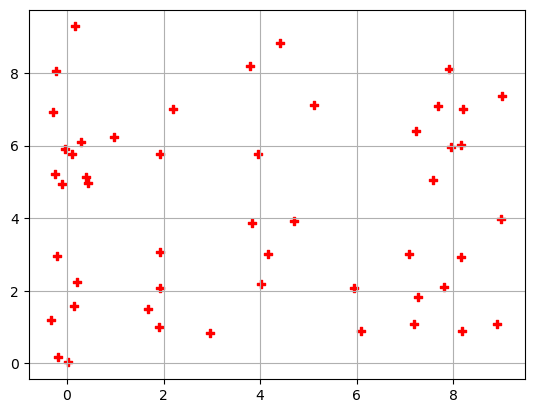

In [353]:
K = 50
max_size_city = 10
etalement = 2

grid= create_city(K,max_size_city,etalement)

plt.grid()
plt.scatter(grid[:,0],grid[:,1],marker = "P",color = "red")




In [358]:
dist = lambda u,v : np.linalg.norm(u-v,2)
sigma = np.random.permutation(K)

f=lambda x : distance_permut(x,dist,grid) 
N=1000
T_min=0.005
x0 = sigma
T0 = 1


#  
X,F = simulated_annealing(f,N,T_min,x0,T0)

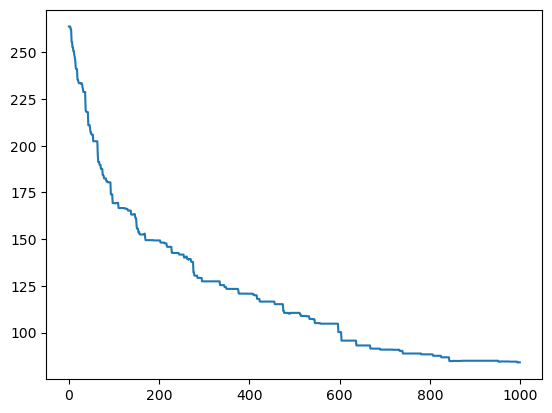

In [359]:
plt.plot(F)

3\. Test your algorithm for $K = 50$ randomly located cities (i.e., generate the values of $(C_k)_{1 \leq k \leq K}$ randomly). Display both the evolution of the cost function with the iterations and the final route. Empirically tune the value $T_0$ to improve the result of the algorithm.

> *Notes*:
>
> a) for reproducibility, set the random seed of the random number generator to a specific value, *e.g.*, 0;
>
> b) to generate an initial path $x_0$, you can for instance randomly select a starting city $k$, and define the next city sequentially by taking its *nearest neighbour*;
>
> c) to display the trajectory, you can use `matplotlib.pyplot.arrow` to display an arrow between two consecutive points.